In [36]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration

We then load the Breast Cancer Wisconsin Diagnostic Dataset from `sklearn.datasets`.

In [37]:
# Load dataset
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

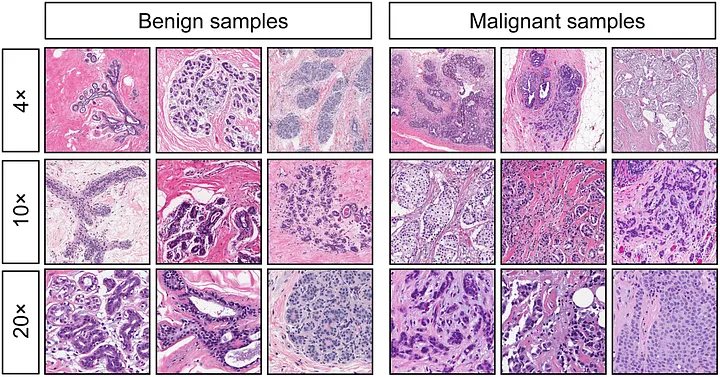

We convert the dataset into a pandas.DataFrame, assigning appropriate column names and adding both the target variable (0 for malignant, 1 for benign) and human-readable target names.

In [38]:

# Create DataFrame with features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['target'] = data.target

# Optionally, map the target values to class names
df['target_name'] = df['target'].map(dict(enumerate(data.target_names)))

# Display the first few rows
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0          

In [39]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_name'],
      dtype='object')

[Paper explaining](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=ED3D95A80360B4B45F05F2737ECC7B22?sequence=1) how feature are extracted.

In [40]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

### Data Quality Check

Here, we check the dataset for:

- Null values (NaNs) – which could break the ML pipeline.

- Infinite values – which can distort statistics and cause model instability.

No missing or infinite values indicate a clean dataset ready for analysis.

In [41]:
print("🔍 Data Quality Check\n" + "-"*40)
    
# Check for nulls
null_counts = df.isnull().sum()
has_nulls = df.isnull().values.any()
print("📌 Null (NaN) values per column:")
print(null_counts[null_counts > 0] if has_nulls else "✅ No null values found.")

# Select numeric columns only for isinf check
numeric_df = df.select_dtypes(include=[np.number])

# Check for infinite values
inf_counts = np.isinf(numeric_df).sum()
has_infs = np.isinf(numeric_df).values.any()
print("\n📌 Infinite values per column (numeric only):")
print(inf_counts[inf_counts > 0] if has_infs else "✅ No infinite values found.")

🔍 Data Quality Check
----------------------------------------
📌 Null (NaN) values per column:
✅ No null values found.

📌 Infinite values per column (numeric only):
✅ No infinite values found.


### Class Distribution
We visualize the class distribution of diagnoses (malignant vs. benign). This helps us identify if there's a class imbalance, which is common in medical datasets.

/tmp/ipykernel_1298231/3289978772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_name', data=df, palette='pastel')


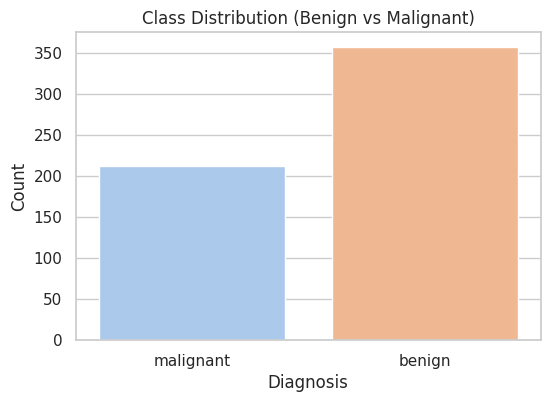

In [42]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='target_name', data=df, palette='pastel')
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


### Feature Distribution by Diagnosis
For selected features like mean radius, mean texture, and mean area, we plot distributions split by diagnosis.
This helps in visually identifying features that may distinguish between malignant and benign tumors.

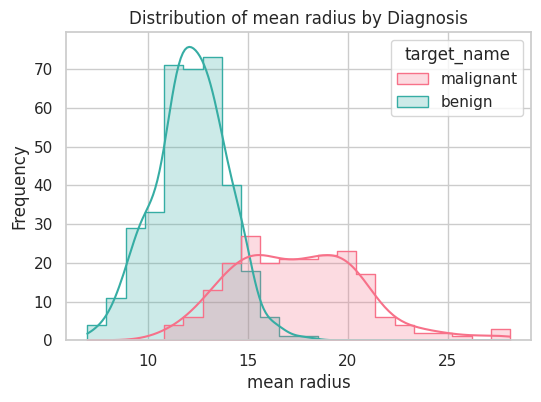

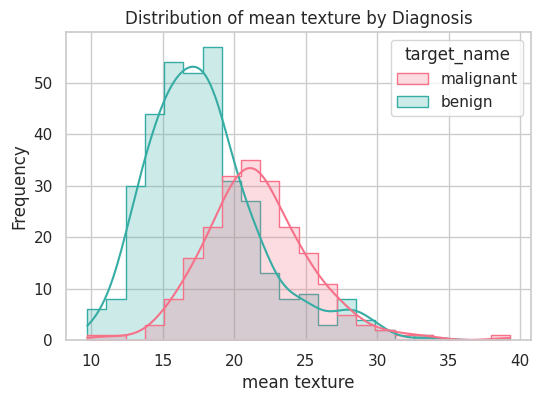

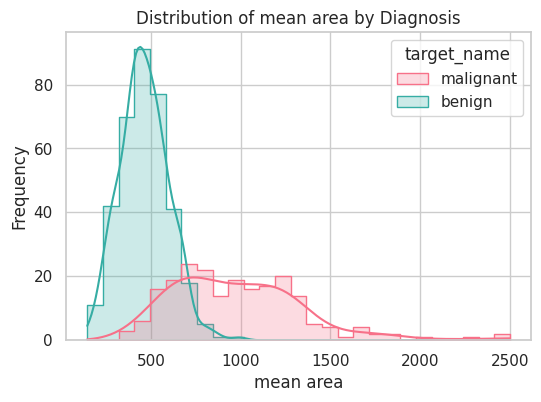

In [43]:
features_to_plot = ['mean radius', 'mean texture', 'mean area']

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue='target_name', kde=True, palette='husl', element='step')
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


### Correlation Heatmap
This heatmap shows how features correlate with each other and with the target.
Understanding correlation helps us:

- Reduce feature redundancy

- Identify strong predictors

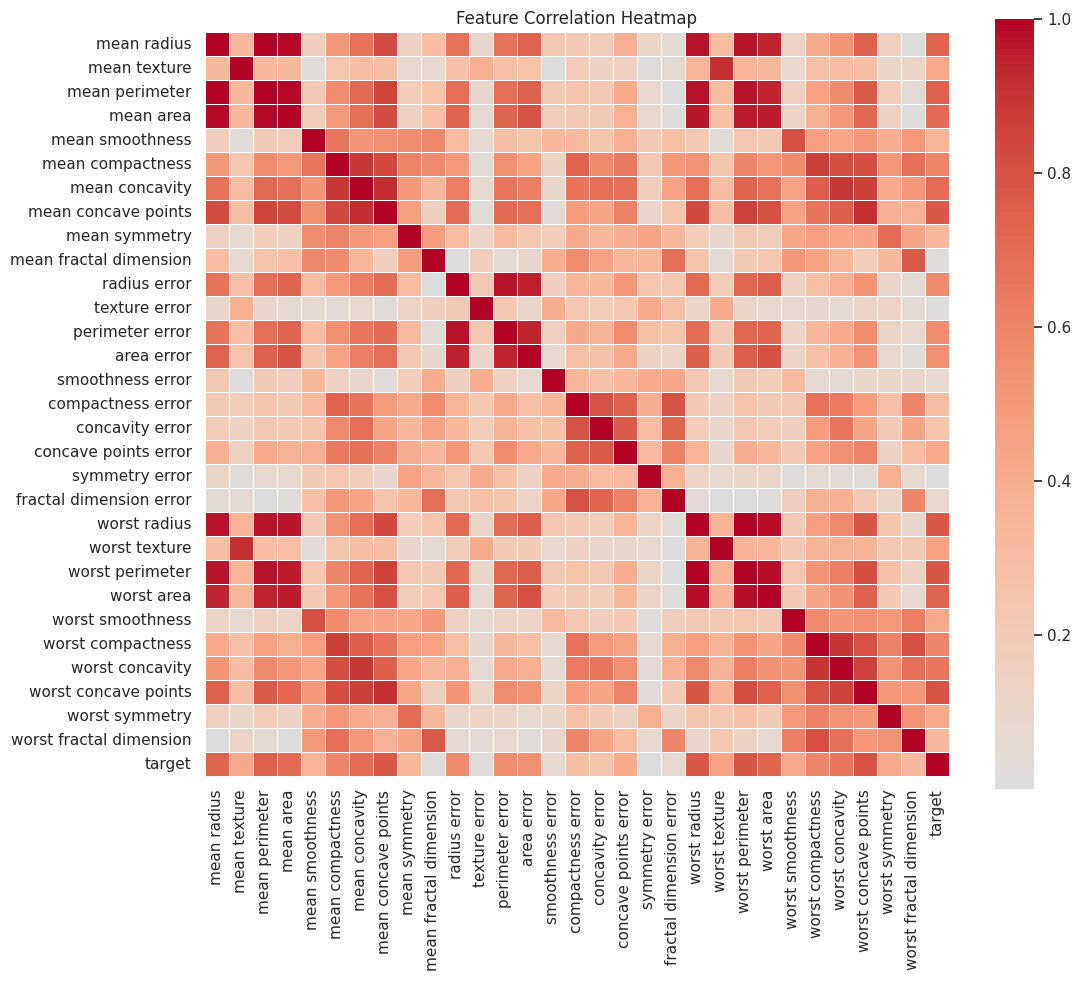

In [44]:
plt.figure(figsize=(12,10))
correlation = df.drop(columns=['target_name']).corr().abs()
sns.heatmap(correlation, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


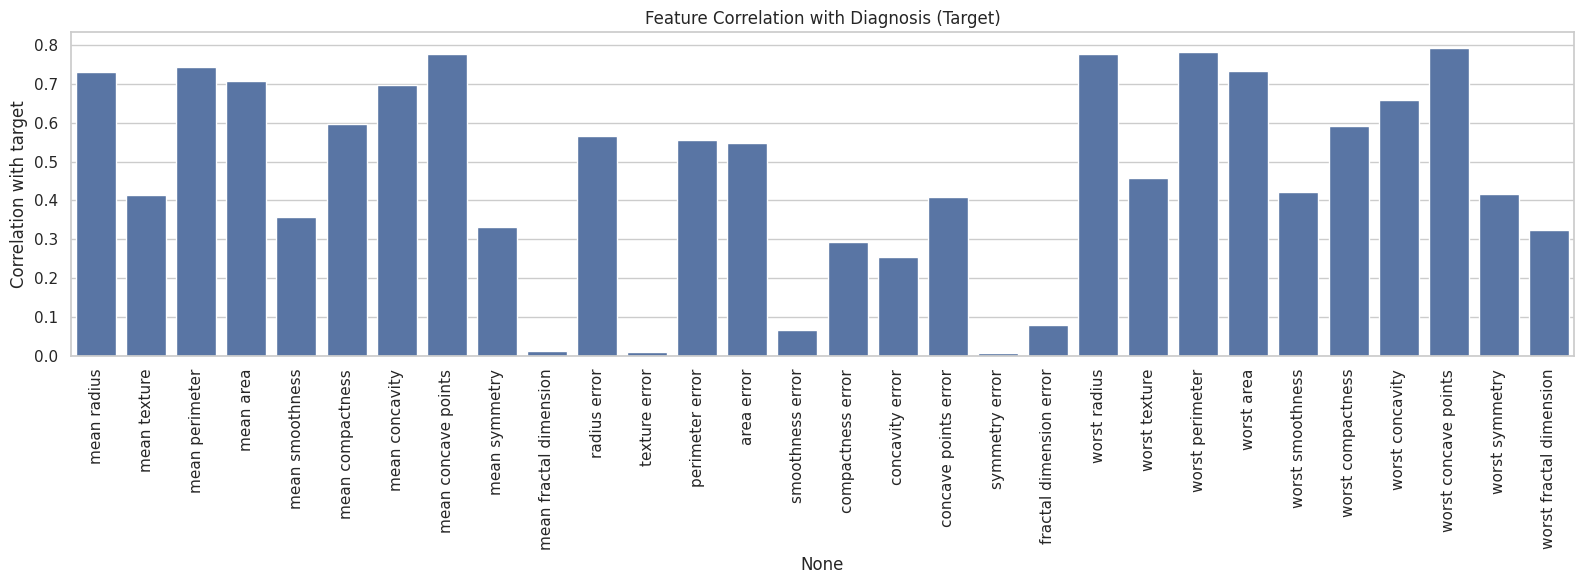

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation with the target
corr_with_target = correlation['target'].drop('target')  # exclude 'target' itself

# Plot correlations
plt.figure(figsize=(16, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.ylabel('Correlation with target')
plt.title('Feature Correlation with Diagnosis (Target)')
plt.tight_layout()
plt.show()


In [46]:
top = corr_with_target.abs().sort_values(ascending=False).head(10)
print(f"Top features most correlated with the target:\n{top}")


Top features most correlated with the target:
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64


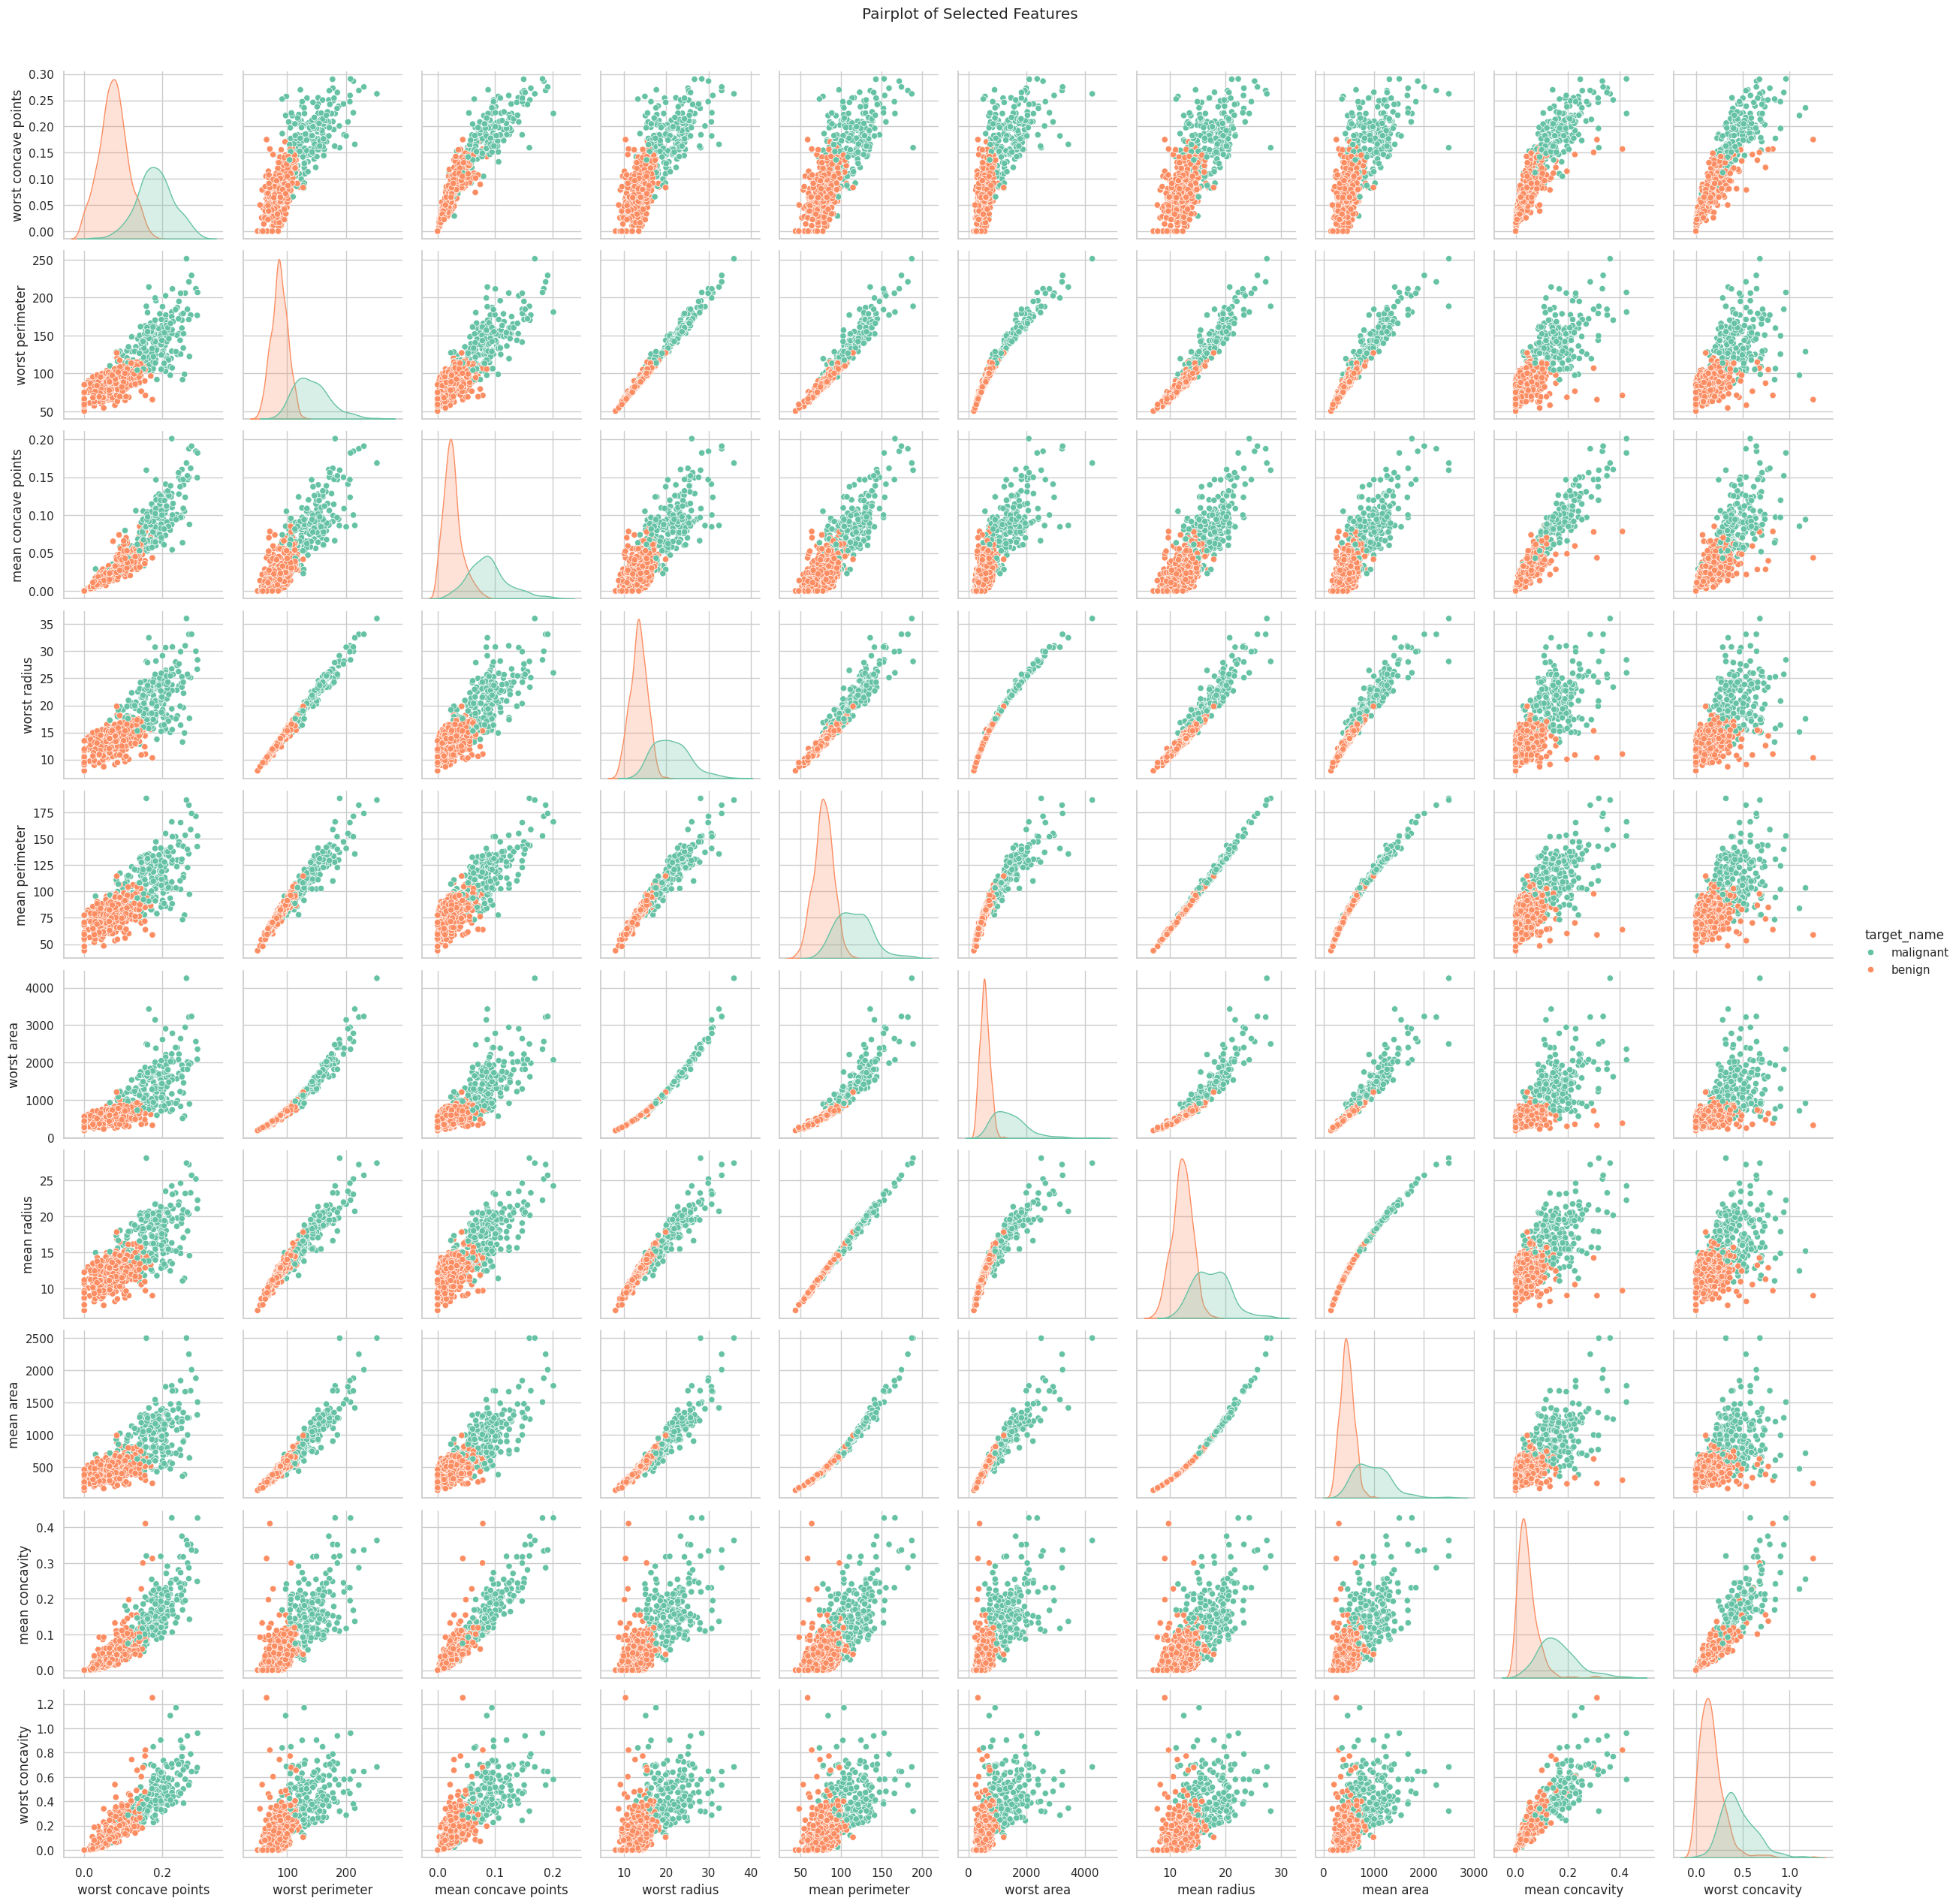

In [47]:
selected =  top.index.tolist() + ['target_name']
sns.pairplot(df[selected], hue='target_name', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


## Model Development

### Data preparation

To mitigate bias from class imbalance, we downsample the majority class (benign) to match the minority class (malignant).
This ensures the model isn't biased toward predicting the majority class.

In [48]:
from sklearn.utils import resample

# Separate classes
df_majority = df[df['target'] == 1]  # benign
df_minority = df[df['target'] == 0]  # malignant

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine balanced data
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Shuffle the DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['target_name'].value_counts())


target_name
malignant    212
benign       212
Name: count, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

# Drop non-numeric or unnecessary columns (like 'target_name')
X = df_balanced.drop(columns=['target', 'target_name'])  # Features
y = df_balanced['target']                                # Labels


We separate the data into:

- Training set (80%) for learning

- Test set (20%) for evaluating performance

We also stratify to preserve class proportions across both sets.

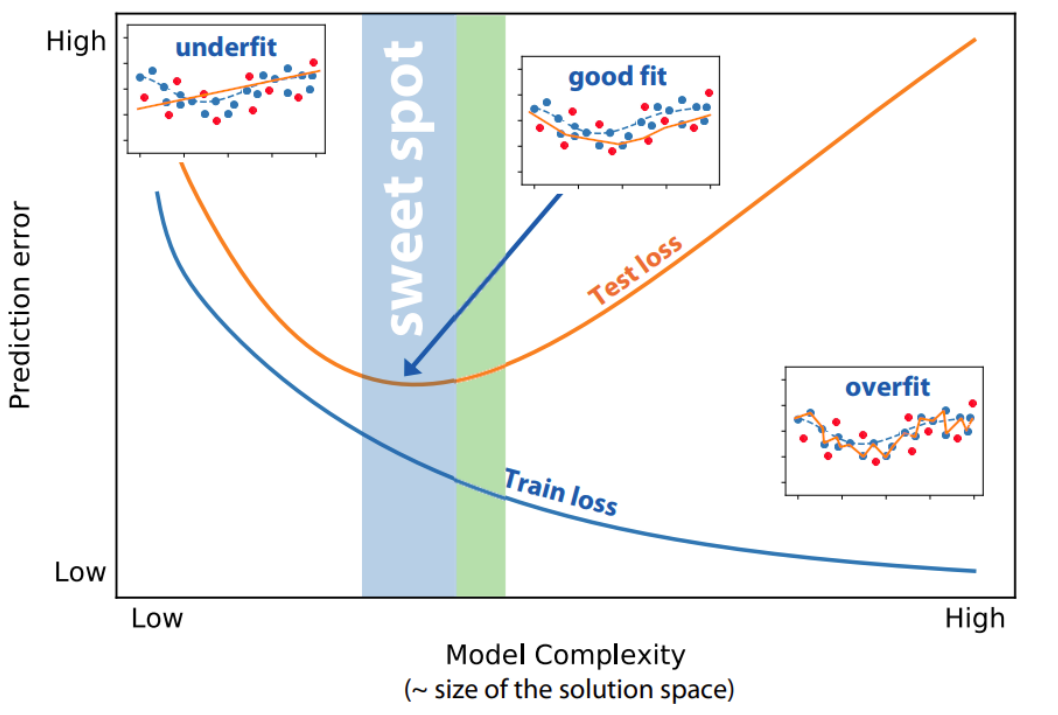

In [50]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
    stratify=y # 
    )

# Optional: Check class balance in splits
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("\nTest target distribution:\n", y_test.value_counts(normalize=True))


Train target distribution:
 target
1    0.501475
0    0.498525
Name: proportion, dtype: float64

Test target distribution:
 target
0    0.505882
1    0.494118
Name: proportion, dtype: float64


Standardization (zero mean, unit variance) is applied to features using StandardScaler.
This step is especially important for algorithms sensitive to feature scales (e.g. neural networks, etc.).

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, then transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Random Forest Classifier

Random Forest is an ensemble method (ensemble methods are powerful machine learning techniques that combine multiple models to improve the overall performance of a predictive model) that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [52]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer # loads the dataset

# # Load the dataset
# data = load_breast_cancer()

# # Create a DataFrame from the dataset
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# # Assuming the last column is the target and the rest are features
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=2, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_y_pred = rf_clf.predict(X_test_scaled)


Some relevant terms for the classification:
- TP (True Positive)   - Model correctly predicts the positive class (e.g. cancer present).
- TN (True Negative)   - Model correctly predicts the negative class (e.g. cancer absent).
- FP (False Positive)  - Model incorrectly predicts positive (false alarm).
- FN (False Negative)  - Model incorrectly predicts negative (missed diagnosis).
  
The `classification_report` shows the following metrics for each class:

1. Precision
   
   Precision = TP / (TP + FP)
   Out of all predicted positives, how many were actually correct?
   High precision means few false positives.

2. Recall (also called Sensitivity or True Positive Rate)
   
   Recall = TP / (TP + FN)
   Out of all actual positives, how many were correctly identified?
   High recall means few false negatives (important in medical diagnoses).

3. F1-Score
   
   F1 = 2 * (Precision * Recall) / (Precision + Recall)
   The harmonic mean of precision and recall.
   Balances the trade-off between precision and recall.

4. Support
   The number of actual samples for each class in the dataset.
   Useful for knowing class balance and interpreting average scores.

Example:
If you're predicting cancer (1 = benign, 0 = malignant),
  - High precision for "malignant" means fewer false alarms.
  - High recall for "malignant" means fewer missed cancer cases.

N.B: When dealing with imbalanced classes, F1-score and recall are often more informative than accuracy.


In [53]:

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        43
           1       1.00      0.71      0.83        42

    accuracy                           0.86        85
   macro avg       0.89      0.86      0.86        85
weighted avg       0.89      0.86      0.86        85



<Figure size 500x500 with 0 Axes>

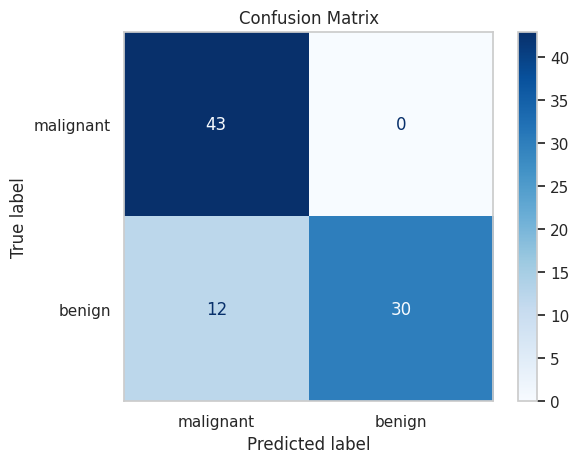

In [54]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, (rf_y_pred > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Plot
plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Feature importance refers to techniques that assign a score to input features based on their usefulness in predicting the target variable.

In Random Forests, the Gini index is used to evaluate the quality of a split in a decision tree and to determine feature importance. It measures the probability of misclassifying a randomly chosen element in a dataset. A Gini index of 0 indicates a pure node (all data points belong to the same class), while a Gini index of 0.5 (in the case of a binary classification) indicates maximum impurity (an equal distribution of classes). 

/home/diluca/Projects/tnt2025_ai_application/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/diluca/Projects/tnt2025_ai_application/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest Accuracy: 0.5058823529411764


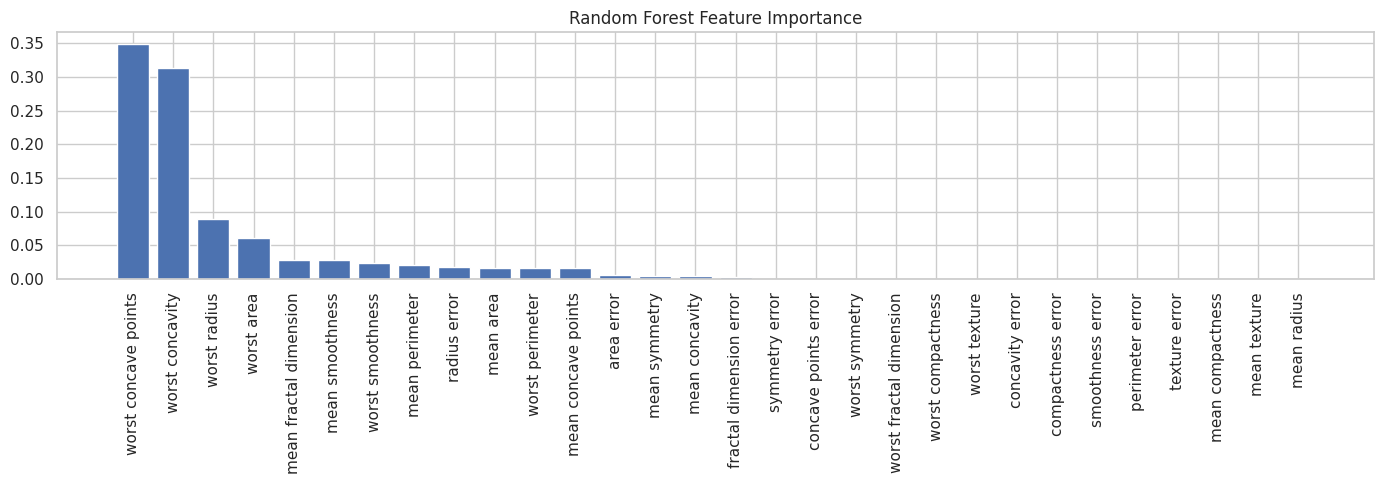

In [55]:

# Feature importance
import matplotlib.pyplot as plt

# Random Forest feature importance
rf_feature_importance = rf_clf.feature_importances_
rf_indices = np.argsort(rf_feature_importance)[::-1]


# Plotting feature importance
plt.figure(figsize=(14, 5))

plt.title("Random Forest Feature Importance")
plt.bar(range(X.shape[1]), rf_feature_importance[rf_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[rf_indices], rotation=90)

print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

acc_rf = rf_clf.score(X_test, y_test)

plt.tight_layout()
plt.show()

In [56]:
# evaluate roc curves for the two classifiers
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC scores
rf_y_pred_proba = rf_clf.predict_proba(X_test_scaled)[:,1]
print(rf_y_pred_proba)


[1.  0.5 0.  0.  1.  0.  1.  1.  0.  0.5 0.  1.  0.5 0.  0.5 0.5 0.  0.5
 1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
 0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.5 1.  0.  1.  0.  1.  0.5
 1.  0.  0.  1.  0.5 1.  0.5 1.  0.  1.  0.  1.  1.  0.  0.  1.  0.5 0.
 1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1. ]


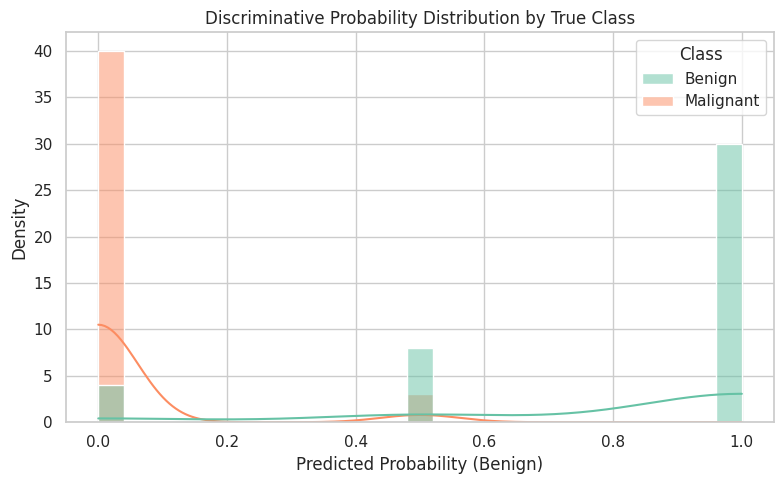

In [57]:

# Create DataFrame for plotting
import pandas as pd
df_plot = pd.DataFrame({
    'Probability': rf_y_pred_proba,
    'True Label': y_test
})
df_plot['Class'] = df_plot['True Label'].map({0: 'Malignant', 1: 'Benign'})

#  Plot discriminative distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df_plot, x='Probability', hue='Class', bins=25, kde=True, palette='Set2', common_norm=False)
plt.title('Discriminative Probability Distribution by True Class')
plt.xlabel('Predicted Probability (Benign)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


The ROC (Receiver Operating Characteristic) curve is built from:

1. True Positive Rate (TPR) — also called Recall or Sensitivity
   TPR = TP / (TP + FN)
   Measures the proportion of actual positives correctly identified.

2. False Positive Rate (FPR)
   FPR = FP / (FP + TN)
   Measures the proportion of actual negatives incorrectly identified as positive.

3. Thresholds
   ROC is generated by varying the classification threshold (e.g., from 0 to 1).
   At each threshold, TPR and FPR are computed to create the curve.

A good model has high TPR and low FPR, forming a curve close to the top-left corner.
The diagonal line (TPR = FPR) represents random guessing.

ROC AUC Scores:
Random Forest: 0.9424141749723145


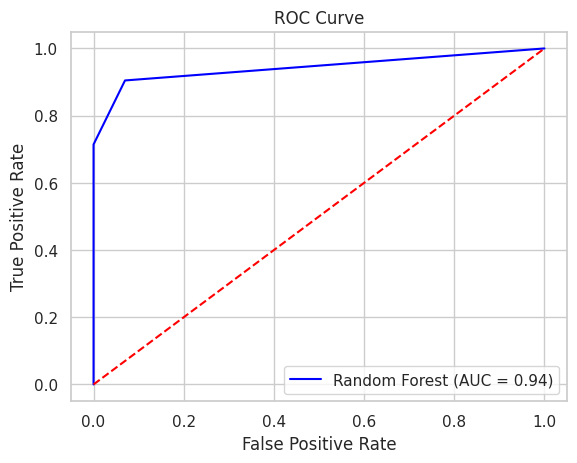

In [58]:

rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)

print("ROC AUC Scores:")
print(f"Random Forest: {rf_roc_auc}")

# Plot ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grids for RF classifier
rf_param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for RF classifier
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the GridSearchCV for Random Forest
print("Starting Grid Search for Random Forest...")
rf_grid_search.fit(X_train_scaled, y_train)
print("Random Forest Grid Search completed.")
print(f"Best parameters found: {rf_grid_search.best_params_}")


# Predict with the best estimators
rf_best_model = rf_grid_search.best_estimator_

rf_y_pred = rf_best_model.predict(X_test_scaled)

# Print the accuracy and classification report for both models
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred)}")
print(classification_report(y_test, rf_y_pred))

Starting Grid Search for Random Forest...
Random Forest Grid Search completed.
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Classifier:
Accuracy: 0.9294117647058824
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.97      0.88      0.93        42

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85



In [60]:
rf_y_pred_proba = rf_best_model.predict_proba(X_test_scaled)[:, 1]


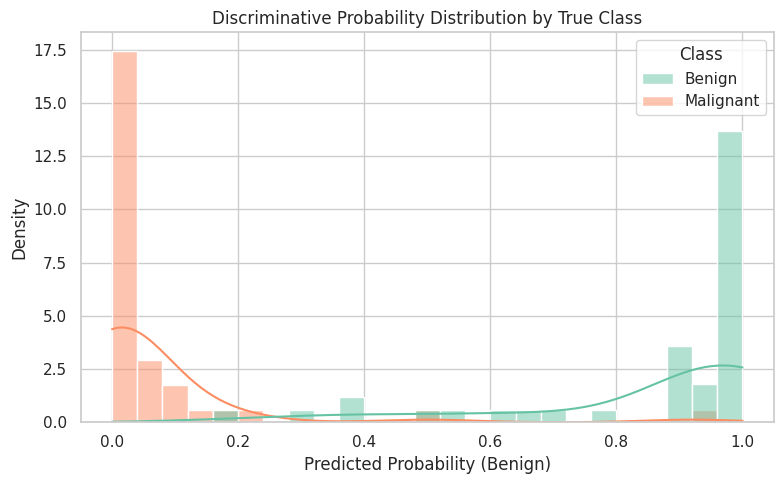

In [61]:

# Create DataFrame for plotting
import pandas as pd
df_plot = pd.DataFrame({
    'Probability': rf_y_pred_proba,
    'True Label': y_test
})
df_plot['Class'] = df_plot['True Label'].map({0: 'Malignant', 1: 'Benign'})

#  Plot discriminative distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df_plot, x='Probability', hue='Class', bins=25, kde=True, palette='Set2', stat='density', common_norm=False)
plt.title('Discriminative Probability Distribution by True Class')
plt.xlabel('Predicted Probability (Benign)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x500 with 0 Axes>

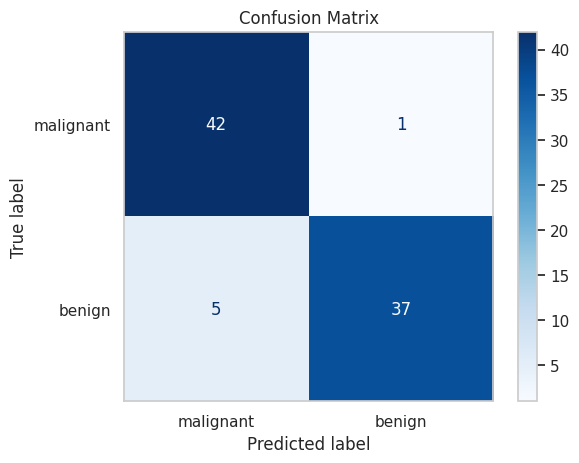

In [62]:
# Compute confusion matrix
cm = confusion_matrix(y_test, (rf_y_pred > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Plot
plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

ROC AUC Scores:
Random Forest: 0.9424141749723145


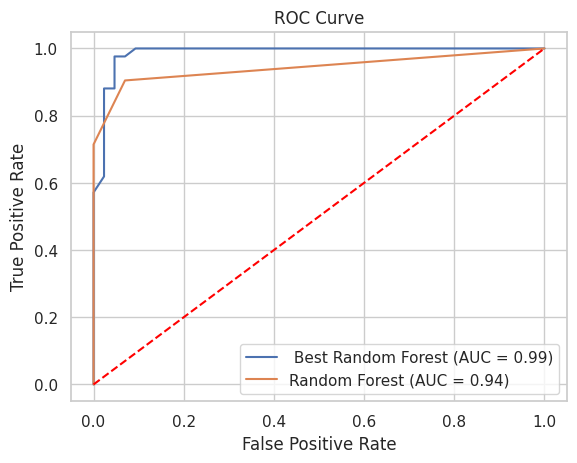

In [63]:

rf_roc_auc_best = roc_auc_score(y_test, rf_y_pred_proba)

print("ROC AUC Scores:")
print(f"Random Forest: {rf_roc_auc}")

# Plot ROC curves
rf_fpr_best, rf_tpr_best, _ = roc_curve(y_test, rf_y_pred_proba)

plt.figure()
plt.plot(rf_fpr_best, rf_tpr_best, label=f' Best Random Forest (AUC = {rf_roc_auc_best:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Simple Neural Network

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report


In [65]:

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # shape (N, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [66]:
# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [67]:

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 4),
            nn.ReLU(),
            nn.Linear(4,4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.net(x)


Epoch [1/20] - Train Loss: 0.5776 | Test Loss: 0.4820
Epoch [2/20] - Train Loss: 0.3708 | Test Loss: 0.3016


Epoch [3/20] - Train Loss: 0.2104 | Test Loss: 0.1857
Epoch [4/20] - Train Loss: 0.1301 | Test Loss: 0.1163
Epoch [5/20] - Train Loss: 0.0999 | Test Loss: 0.1017

📊 Evaluation after epoch 5:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.93      1.00      0.97        42

    accuracy                           0.96        85
   macro avg       0.97      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85

------------------------------------------------------------
Epoch [6/20] - Train Loss: 0.0835 | Test Loss: 0.0958
Epoch [7/20] - Train Loss: 0.0745 | Test Loss: 0.1038
Epoch [8/20] - Train Loss: 0.0708 | Test Loss: 0.0920
Epoch [9/20] - Train Loss: 0.0646 | Test Loss: 0.0898
Epoch [10/20] - Train Loss: 0.0600 | Test Loss: 0.0941

📊 Evaluation after epoch 10:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benig

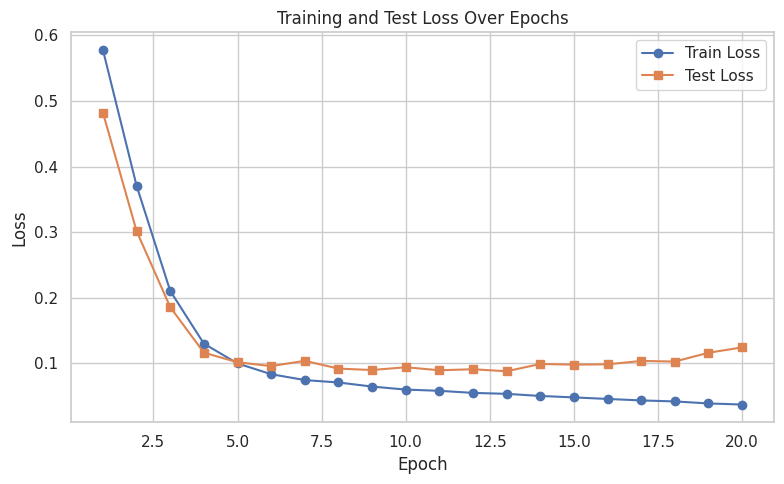

In [68]:
model = SimpleNN(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 20
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_X.size(0)

    avg_train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # Evaluate test loss
    model.eval()
    epoch_test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            epoch_test_loss += loss.item() * batch_X.size(0)

    avg_test_loss = epoch_test_loss / len(test_loader.dataset)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f}")

    # Print metrics every 5 epochs
    if (epoch + 1) % 5 == 0:
        all_preds, all_labels = [], []
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                preds = model(batch_X)
                all_preds.append((preds > 0.5).float())
                all_labels.append(batch_y)
        y_pred = torch.cat(all_preds).cpu().numpy()
        y_true = torch.cat(all_labels).cpu().numpy()
        print(f"\n📊 Evaluation after epoch {epoch+1}:")
        print(classification_report(y_true, y_pred, target_names=data.target_names))
        print("-" * 60)

# 📉 Plot training and test loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

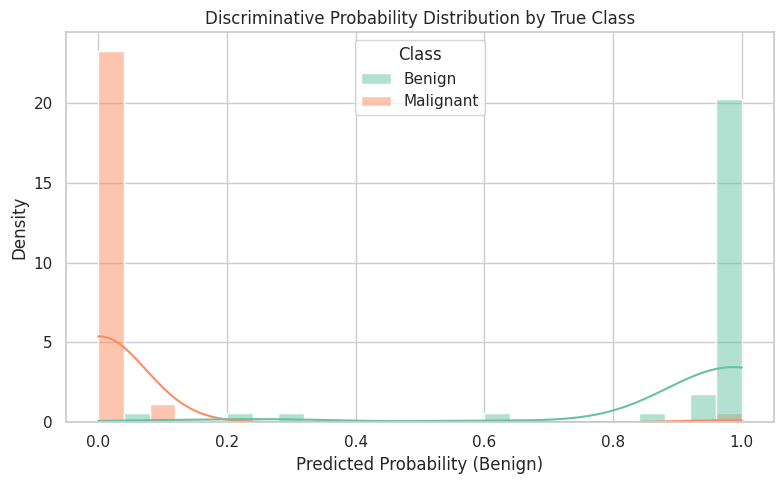

In [69]:
import seaborn as sns

# Switch to evaluation mode
model.eval()

# Get predicted probabilities for test set
all_probs = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        probs = model(batch_X)
        all_probs.append(probs)
        all_labels.append(batch_y)

# Concatenate all predictions and labels
y_prob = torch.cat(all_probs).cpu().numpy().flatten()
y_true = torch.cat(all_labels).cpu().numpy().flatten()

# Create DataFrame for plotting
import pandas as pd
df_plot = pd.DataFrame({
    'Probability': y_prob,
    'True Label': y_true
})
df_plot['Class'] = df_plot['True Label'].map({0: 'Malignant', 1: 'Benign'})

#  Plot discriminative distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df_plot, x='Probability', hue='Class', bins=25, kde=True, palette='Set2', stat='density', common_norm=False)
plt.title('Discriminative Probability Distribution by True Class')
plt.xlabel('Predicted Probability (Benign)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


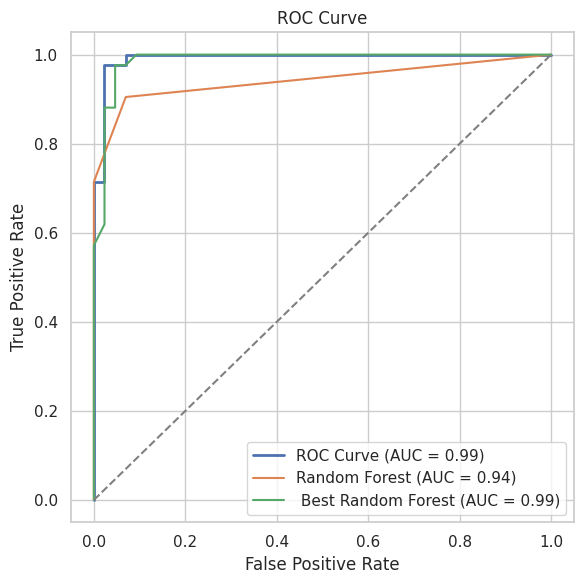

In [70]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})',  lw=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(rf_fpr_best, rf_tpr_best, label=f' Best Random Forest (AUC = {rf_roc_auc_best:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
